In [1]:
import cobra
import cometspy as c
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
test_tube = c.layout()
test_tube.set_specific_metabolite('glc__D_e', 0.2) #设置葡萄糖为11mmol
test_tube.set_specific_metabolite('o2_e',0.02)#空气中氧气摩尔质量约为0.01 mol/L
test_tube.set_specific_metabolite('nh4_e',1000)#设置氨,数值不变
test_tube.set_specific_metabolite('pi_e',0.1)#设置磷酸,数值不变
test_tube.set_specific_metabolite('h2o_e',-0.001)#设置磷酸,数值不变
test_tube.set_global_periodic_media('h2o_e',function = 'step',amplitude = 0.1,period = 1, phase = 0, offset = -0.0001)#设置环境水
test_tube.set_specific_metabolite('h_e',1e-7, static= True)#设置氢离子,数值不变

building empty layout model
models will need to be added with layout.add_model()


D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\layout.py:831: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.media = pd.concat([self.media,


In [3]:
abundant_trace_metabolites =['ca2_e', 'cl_e', 'cobalt2_e', 'cu2_e', 'fe2_e', 'fe3_e', 'k_e', 'mg2_e', 'mn2_e', 'mobd_e', 'na1_e', 'ni2_e', 'sel_e', 'so3_e', 'so4_e', 'tungs_e', 'zn2_e']

In [4]:
for met in abundant_trace_metabolites:
    test_tube.set_specific_metabolite(met, 0.1)

In [5]:
model = cobra.io.read_sbml_model('e_coli_core.xml')#导入全基因组模型
iYO = c.model(model)#导入的模型转为comets模型
iYO.change_bounds('EX_glc__D_e', -1000, 1000)
#iYO.change_bounds('EX_co2_e', 0, 1000)
iYO.initial_pop = [0, 0, 5e-5]#设置初始生物量，坐标（0，0），生物量5e-6
test_tube.add_model(iYO)#把设置好的模型载入
sim_params = c.params()
sim_params.set_param('defaultVmax', 18.5)
sim_params.set_param('defaultKm', 0.000015)
sim_params.set_param('maxCycles', 1000)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 1)
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)
sim_params.set_param('MediaLogRate', 1)
#sim_params.set_param('writeBiomassLog', True)
#sim_params.set_param('BiomassLogRate', 100)
experiment = c.comets(test_tube, sim_params)
experiment.run()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-23


D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\model.py:654: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.smat = pd.concat([self.smat, cdf])
D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\model.py:667: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.objective = [int(self.reactions[self.reactions.



Running COMETS simulation ...

Debug Here ...
Done!


D:\pythoncode\comets\.venv\Lib\site-packages\cometspy\comets.py:437: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.media = pd.read_csv(self.working_dir + self.parameters.all_params[


In [6]:
print(experiment.total_biomass)

      cycle  e_coli_core
0         0     0.000050
1         1     0.000051
2         2     0.000051
3         3     0.000052
4         4     0.000052
...     ...          ...
996     996     0.005528
997     997     0.005528
998     998     0.005528
999     999     0.005528
1000   1000     0.005528

[1001 rows x 2 columns]


Text(0, 0.5, 'Biomass (gr.)')

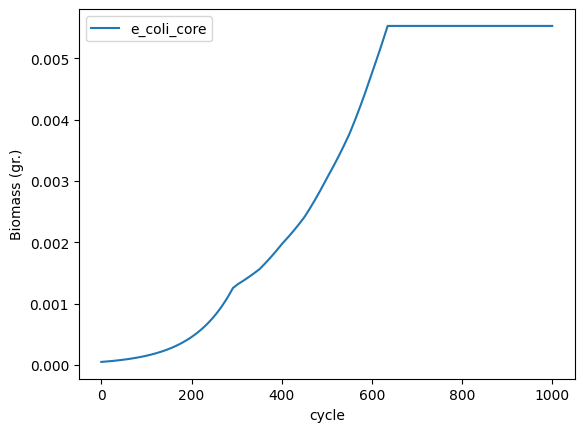

In [7]:
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")

Text(0, 0.5, 'Concentration (mmol)')

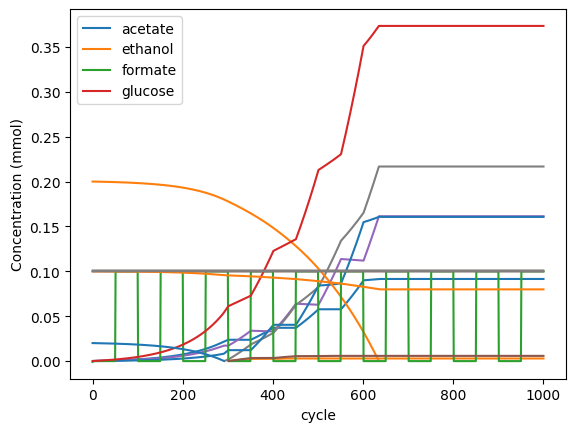

In [8]:
media = experiment.media.copy()
media2 = experiment.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose',))
ax.set_ylabel("Concentration (mmol)")

In [9]:
txt=media.groupby('metabolite')
print(txt.get_group('h2o_e').reset_index)

<bound method DataFrame.reset_index of       metabolite  cycle  x  y  conc_mmol
7          h2o_e      0  1  1    -0.0010
33         h2o_e      1  1  1    -0.0001
59         h2o_e      2  1  1    -0.0001
85         h2o_e      3  1  1    -0.0001
111        h2o_e      4  1  1    -0.0001
...          ...    ... .. ..        ...
26930      h2o_e    996  1  1     0.0999
26957      h2o_e    997  1  1     0.0999
26984      h2o_e    998  1  1     0.0999
27011      h2o_e    999  1  1     0.0999
27038      h2o_e   1000  1  1     0.0999

[1001 rows x 5 columns]>


In [10]:
txt2=media2.groupby('metabolite')
print(txt2.get_group('co2_e').reset_index)

<bound method DataFrame.reset_index of       metabolite  cycle  x  y  conc_mmol
26         co2_e      1  1  1   0.000008
52         co2_e      2  1  1   0.000016
78         co2_e      3  1  1   0.000024
104        co2_e      4  1  1   0.000033
130        co2_e      5  1  1   0.000041
...          ...    ... .. ..        ...
26923      co2_e    996  1  1   0.161317
26950      co2_e    997  1  1   0.161317
26977      co2_e    998  1  1   0.161317
27004      co2_e    999  1  1   0.161317
27031      co2_e   1000  1  1   0.161317

[1000 rows x 5 columns]>


In [11]:
txt=media.groupby('metabolite')
print(txt.get_group('o2_e').reset_index)

<bound method DataFrame.reset_index of      metabolite  cycle  x  y  conc_mmol
16         o2_e      0  1  1   0.020000
42         o2_e      1  1  1   0.019991
68         o2_e      2  1  1   0.019981
94         o2_e      3  1  1   0.019972
120        o2_e      4  1  1   0.019962
...         ...    ... .. ..        ...
7478       o2_e    287  1  1   0.001040
7504       o2_e    288  1  1   0.000823
7530       o2_e    289  1  1   0.000604
7556       o2_e    290  1  1   0.000384
7582       o2_e    291  1  1   0.000165

[292 rows x 5 columns]>


In [12]:
experiment.media

,metabolite,cycle,x,y,conc_mmol
0,ca2_e,0,1,1,0.100000
1,cl_e,0,1,1,0.100000
2,cobalt2_e,0,1,1,0.100000
3,cu2_e,0,1,1,0.100000
4,fe2_e,0,1,1,0.100000
...,...,...,...,...,...
27049,so3_e,1000,1,1,0.100000
27050,so4_e,1000,1,1,0.100000
27051,succ_e,1000,1,1,0.005738
27052,tungs_e,1000,1,1,0.100000


In [13]:
#df1=experiment.media
#df2=experiment.total_biomass
#with pd.ExcelWriter('ecoliperiod002.xlsx') as writer:  
#    df1.to_excel(writer, index = False, sheet_name='media')
#    df2.to_excel(writer, index = False, sheet_name='biomass')

In [14]:
test_tube.all_exchanged_mets

['ac_e',
 'acald_e',
 'akg_e',
 'co2_e',
 'etoh_e',
 'for_e',
 'fru_e',
 'fum_e',
 'glc__D_e',
 'gln__L_e',
 'glu__L_e',
 'h2o_e',
 'h_e',
 'lac__D_e',
 'mal__L_e',
 'nh4_e',
 'o2_e',
 'pi_e',
 'pyr_e',
 'succ_e']